# Geospatial Analysis 

## Part 1: Importing the libraries along with folium.

In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon, LineString
import geopandas as gpd
import re
import matplotlib.pyplot as plt
import getpass
import folium 
import math 
import requests
import polyline
import random
import seaborn as sns


# This one allows me not to put plt.show() in every graph.
%matplotlib inline

In [2]:
user = getpass.getuser()
user

'aimanmalik'

In [3]:
in_path =  '../Problem_Set_3/Output/'
out_path = '/Users/' +  user + '/Downloads/Econ 489/Problem_Set_4/Output/'
out_path

'/Users/aimanmalik/Downloads/Econ 489/Problem_Set_4/Output/'

## Importing dataset

In [4]:
df = pd.read_csv(in_path + "ConvenienceStores_BCS.csv", delimiter= ',')
df.drop("Unnamed: 0",axis=1)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude
0,-1XN0-koGQxKZ5KritI3WQ,nam-noodles-and-more-college-station,Nam Noodles & More,https://s3-media2.fl.yelpcdn.com/bphoto/LqoKYX...,0.0,https://www.yelp.com/biz/nam-noodles-and-more-...,79.0,"[{'alias': 'vietnamese', 'title': 'Vietnamese'}]",4.5,"{'latitude': 30.555328354873854, 'longitude': ...","['delivery', 'pickup']",NaN,"{'address1': '910 William D Fitch', 'address2'...",1.979705e+10,(979) 704-5496,573.366297,30.555328,-96.261617
1,-Z1DtXVGsHPn9H-8okFfVQ,chois-restaurant-college-station-3,Choi's Restaurant,https://s3-media3.fl.yelpcdn.com/bphoto/4v1Kun...,0.0,https://www.yelp.com/biz/chois-restaurant-coll...,98.0,"[{'alias': 'korean', 'title': 'Korean'}]",4.0,"{'latitude': 30.619933, 'longitude': -96.320774}","['delivery', 'pickup']",$$,"{'address1': '311 Dominik Dr', 'address2': '',...",1.979704e+10,(979) 703-7911,1608.370799,30.619933,-96.320774
2,06fULC6vw_n_gxdLMkCGCA,imperial-chinese-and-sushi-bryan-2,Imperial Chinese & Sushi,https://s3-media3.fl.yelpcdn.com/bphoto/R8tgdP...,0.0,https://www.yelp.com/biz/imperial-chinese-and-...,134.0,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 30.6754494, 'longitude': -96.3390...","['pickup', 'delivery']",$$,"{'address1': '980 N Earl Rudder Fwy', 'address...",1.979775e+10,(979) 774-7888,3120.628734,30.675449,-96.339020
3,06wkrksSXYiozgEr-H1GPg,snooze-an-a-m-eatery-college-station-4,"Snooze, an A.M. Eatery",https://s3-media3.fl.yelpcdn.com/bphoto/HVsBJE...,0.0,https://www.yelp.com/biz/snooze-an-a-m-eatery-...,83.0,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,"{'latitude': 30.634775605802876, 'longitude': ...",[],$$,"{'address1': '711 University Dr E', 'address2'...",1.979921e+10,(979) 921-1750,1032.800664,30.634776,-96.327733
4,0YehAX70ilPcnYbvRCyw9g,napa-flats-wood-fired-kitchen-college-station-...,Napa Flats Wood Fired Kitchen - College Station,https://s3-media4.fl.yelpcdn.com/bphoto/CbbBO5...,0.0,https://www.yelp.com/biz/napa-flats-wood-fired...,724.0,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 30.61604025619329, 'longitude': -...","['delivery', 'pickup']",$$,"{'address1': '1727 Texas Ave S', 'address2': '...",1.979383e+10,(979) 383-2500,3919.960840,30.616040,-96.318881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,ybulcs6QSqG82J6MFovNPg,the-downtown-elixir-and-spirits-bryan-2,The Downtown Elixir and Spirits,https://s3-media2.fl.yelpcdn.com/bphoto/cV0yg0...,0.0,https://www.yelp.com/biz/the-downtown-elixir-a...,51.0,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.0,"{'latitude': 30.67296, 'longitude': -96.37383}",['delivery'],$$,"{'address1': '120 S Main St', 'address2': '', ...",1.979822e+10,(979) 822-2120,876.119145,30.672960,-96.373830
128,yif7JJdoixqgqJOsKn_WpQ,blaze-pizza-college-station,Blaze Pizza,https://s3-media3.fl.yelpcdn.com/bphoto/Tjl1OL...,0.0,https://www.yelp.com/biz/blaze-pizza-college-s...,145.0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",4.0,"{'latitude': 30.62573006, 'longitude': -96.338...","['pickup', 'delivery']",$,"{'address1': '143 Century Square Dr', 'address...",1.979227e+10,(979) 227-2629,429.086315,30.625730,-96.338646
129,ympDU3oTeVF4QKSR-zxpEw,taqueria-el-tio-bryan,Taqueria El Tio,https://s3-media2.fl.yelpcdn.com/bphoto/ph5NnA...,0.0,https://www.yelp.com/biz/taqueria-el-tio-bryan...,49.0,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0,"{'latitude': 30.681931, 'longitude': -96.372626}",[],$,"{'address1': '911 N Bryan Ave', 'address2': ''...",NaN,NaN,406.224398,30.681931,-96.372626
130,zcPlAXcx_cCZAfEo7tR6ig,saltgrass-steak-house-college-station-3,Saltgrass Steak House,https://s3-media2.fl.yelpcdn.com/bphoto/sTzZtK...,0.0,https://www.yelp.com/biz/saltgrass-steak-house...,151.0,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...",3.0,"{'latitude': 30.564662148860542, 'longitude': ...","['deliv

# Maps using name as the marker.

In [5]:
f = folium.Figure(width=800, height=500)
m = folium.Map(location=[30.601389, -96.314445], zoom_start=10, tiles='CartoDB positron').add_to(f) #30.555328, -96.261617], zoom_start=10, tiles='CartoDB positron').add_to(f)
for i in range(0,len(df)):
   folium.Marker(
      location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
       popup=df.iloc[i]['name'],
      icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: blue">{df.iloc[i]['name']}</div>""")
   ).add_to(m)
m

# Maps using circle as the marker.

In [6]:
f = folium.Figure(width=800, height=500)
m = folium.Map(location=[30.601389, -96.314445], zoom_start=10, tiles='CartoDB positron').add_to(f)
for i in range(0,len(df)):
   folium.CircleMarker(
      location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
      popup=df.iloc[i]['name'],radius=0.5, color = 'red'
   ).add_to(m)
m

# Haversine Function

In [7]:
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [8]:
 def distance_harvesine(df):

    # I'll use a dictionary because it doesn't need to have a pre-defined size.
    
    dict_distance = {}
    
    df_copy = df.copy(deep=False)      #Making a copy for the dataframe
    
    for i, row in df_copy.iterrows():
        list_distance = []
        
        lon1 = df_copy['longitude'][i]
        lat1 = df_copy['latitude'][i]
        
        origin = (lat1,lon1)

        for j, row in df_copy.iterrows():
            lon2 = df_copy['longitude'][j]
            lat2 = df_copy['latitude'][j]
            
            destination = (lat2,lon2)
            
            try:
                dist = distance(origin, destination)
            except:
                dist = 100000000000
                                
            list_distance.append(dist)
            
            
        dict_distance[i] = list_distance
            
            

    distance_matrix = pd.DataFrame.from_dict(dict_distance)

    return distance_matrix

In [9]:
df_H = distance_harvesine(df)
df_H

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,0.000000,9.147222,15.273195,10.866902,8.696058,5.906763,10.698519,0.333670,0.345711,16.966130,...,5.172956,17.115811,10.689071,0.108862,10.891254,16.923371,10.753903,17.635739,1.114776,0.339412
1,9.147222,0.000000,6.415159,1.779677,0.469246,3.246180,1.876618,8.889460,8.876870,7.820067,...,14.263657,7.969224,1.658370,9.224627,1.781758,7.779979,1.827560,8.492847,8.086619,8.901115
2,15.273195,6.415159,0.000000,4.649801,6.881210,9.533752,5.709800,14.983715,15.040065,3.243806,...,20.215403,3.297534,4.757106,15.361754,5.068607,3.340623,5.528654,3.293660,14.168938,14.991482
3,10.866902,1.779677,4.649801,0.000000,2.248892,4.993711,1.654132,10.599189,10.606429,6.147734,...,15.946491,6.292160,0.246238,10.947681,0.897646,6.121396,1.449796,6.777408,9.789973,10.609736
4,8.696058,0.469246,6.881210,2.248892,0.000000,2.790564,2.191458,8.441567,8.422702,8.270191,...,13.821860,8.420117,2.124146,8.772368,2.205686,8.227551,2.176700,8.950676,7.641276,8.453568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,16.923371,7.779979,3.340623,6.121396,8.227551,11.016805,6.334353,16.668675,16.647655,0.155290,...,22.042175,0.275354,6.329611,16.999113,6.036491,0.000000,6.237715,1.004153,15.866582,16.680509
128,10.753903,1.827560,5.528654,1.449796,2.176700,4.871961,0.210745,10.515548,10.465125,6.298726,...,15.910364,6.453312,1.603831,10.824267,0.571871,6.237715,0.000000,7.044050,9.728142,10.529001
129,17.635739,8.492847,3.293660,6.777408,8.950676,11.739013,7.156764,17.372313,17.368811,0.870501,...,22.723649,0.728799,6.968794,17.714606,6.792026,1.004153,7.044050,0.000000,16.564763,17.383240
130,1.114776,8.086619,14.168938,9.789973,7.641276,4.861196,9.681713,0.814821,0.957524,15.906147,...,6.183770,16.054815,9.607559,1.211896,9.843351,15.866582,9.728142,16.564763,0.000000,0.823127


# OSRM Function

In [10]:
url1 = 'http://router.project-osrm.org/route/v1/driving/'

long1 = df['longitude'][0]
long2 = df['longitude'][1]

lat1 = df['latitude'][0]
lat2 = df['latitude'][1]

# Note how to separate the two locations (relative to how to separate latitude and longitude)
url2 = str(long1) + ',' + str(lat1) + ';' + str(long2) + ',' + str(lat2)

url = url1 + url2
print(url) 

http://router.project-osrm.org/route/v1/driving/-96.26161660000102,30.55532835487385;-96.320774,30.619933


In [11]:
r = requests.get(url)
r

<Response [200]>

In [12]:
res = r.json()
res

{'code': 'Ok',
 'routes': [{'geometry': 'eznyDnbpjQxDzDs@`Ak^kc@yeBffC{`BhcAsaDrkEeJmK',
   'legs': [{'steps': [],
     'summary': '',
     'weight': 673.6,
     'duration': 639.6,
     'distance': 10321}],
   'weight_name': 'routability',
   'weight': 673.6,
   'duration': 639.6,
   'distance': 10321}],
 'waypoints': [{'hint': 'ZX9Ehx89T4e_AAAAGgEAAAAAAAA5AgAA8-AfQvRyakIAAAAA7vPsQmAAAACNAAAAAAAAAB0BAAClWAAA0ClD-v480gEPKkP6wDzSAQAADwO-v8vr',
   'distance': 9.152263,
   'name': '',
   'location': [-96.26168, 30.55539]},
  {'hint': '20H2giZ964tNAAAAQgAAABcAAAAAAAAADANXQj2nNkKZoHtBAAAAAE0AAABCAAAAFwAAAAAAAAClWAAAQkRC-g840wH6QkL6HTnTAQEA_w2-v8vr',
   'distance': 43.415404,
   'name': 'Dominik Drive',
   'location': [-96.320446, 30.619663]}]}

In [13]:
res['routes'][0]['distance']

10321

In [14]:
def distance_osrm(df):

    # I'll use a dictionary because it doesn't need to have a pre-defined size.
    
    url1 = 'http://router.project-osrm.org/route/v1/driving/'
    
    dict_distance = {}
    
    df_copy = df.copy(deep=False)
    
    for i, row in df_copy.iterrows():
        list_distance = []
        
        lon1 = df_copy['longitude'][i]
        lat1 = df_copy['latitude'][i]
        
        origin = (lat1,lon1)

        for j, row in df_copy.iterrows():
            lon2 = df_copy['longitude'][j]
            lat2 = df_copy['latitude'][j]
            
            
            # Note how to separate the two locations (relative to how to separate latitude and longitude)
            
            url2 = str(lon1) + ',' + str(lat1) + ';' + str(lon2) + ',' + str(lat2)

            url = url1 + url2
            
            r = requests.get(url)
            res = r.json()            
            dist = res['routes'][0]['distance']      #From frist part you just need th distance 
            
            list_distance.append(dist)
            
            
        dict_distance[i] = list_distance
            
            

    distance_matrix = pd.DataFrame.from_dict(dict_distance)

    return distance_matrix 

In [15]:
df_OSRM = distance_osrm (df)

In [16]:
df_OSRM = df_OSRM/1000
df_OSRM

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,0.0000,10.6634,20.3037,14.0851,9.9530,7.4690,13.0145,1.3543,0.6967,19.7917,...,8.8549,19.8810,13.4401,0.2341,12.2276,19.9850,12.3235,20.6166,2.2806,1.1472
1,10.3210,0.0000,12.2071,3.1451,0.8819,3.8110,3.2003,10.2814,10.6491,9.0080,...,16.8095,9.0973,3.6941,10.3267,2.4133,8.7776,2.5092,9.8329,10.5926,10.1429
2,16.5030,8.7979,0.0000,5.7659,8.8283,11.5459,9.0528,16.4634,16.8311,4.0233,...,22.9914,4.1125,6.7101,16.5087,8.2458,4.2166,8.3617,4.8481,16.7745,16.3249
3,13.8221,3.1116,10.1330,0.0000,3.4416,6.3707,2.4325,13.7825,14.1502,7.4958,...,20.3105,7.5850,0.7330,13.8278,1.6256,7.2599,1.7415,8.3206,14.0937,13.6440
4,9.8626,0.8361,11.9869,3.5100,0.0000,3.3526,3.5652,9.8230,10.1907,11.4749,...,16.3511,11.5642,4.0590,9.8683,2.7783,9.1425,2.8742,12.2998,10.1342,9.6845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,19.9385,8.6451,5.2618,6.8983,8.9751,14.9814,6.9995,19.8989,20.2666,0.3250,...,26.4269,0.3813,7.5425,19.9442,6.6887,0.0000,7.2209,1.0585,20.2101,19.7604
128,12.1779,2.4088,11.5402,1.5912,2.7388,5.6679,0.2516,12.1383,12.5060,7.4542,...,18.6664,7.5434,2.1402,12.1836,0.8595,7.2786,0.0000,8.2790,12.4495,11.9998
129,20.5558,9.7003,4.6610,7.9591,10.0303,15.5987,8.3525,20.5162,20.8839,0.9635,...,27.0442,0.7350,8.6032,20.5615,7.7439,1.0585,8.5738,0.0000,20.8274,20.3777
130,2.1444,8.7471,18.3873,12.1687,8.0366,5.5526,11.0981,1.0920,1.2759,17.8753,...,9.0708,17.9646,11.5238,2.0585,10.3112,18.0686,10.4071,18.7002,0.0000,1.1081


# Creating a Dataframe 

In [17]:
df1 = df.copy(deep=False)
IndexMinDistance = df_H[df_H > 0].idxmin()
IndexMinDistance

df1['Min_Distance_HR'] = np.zeros(len(df1))          #To check which is the closet rival. 
df1['Convenience_Store_Closest'] = ""
df1['Address_of_rival_1'] = ""

bb = df1[['name']]
bb1 = df1 [['location']]
df_H = df_H.astype(np.float64)


for i in np.arange(len(df1)):
#for i in np.arange(np.size(df1[:2])):
    df1['Min_Distance_HR'][i] = df_H.iloc[i,IndexMinDistance[i]]
    df1['Convenience_Store_Closest'][i] = bb.T.iloc[0,IndexMinDistance[i]]
    df1['Address_of_rival_1'][i] = bb1.T.iloc[0,IndexMinDistance[i]]

/Users/aimanmalik/opt/anaconda3/envs/DataScience/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aimanmalik/opt/anaconda3/envs/DataScience/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/aimanmalik/opt/anaconda3/envs/DataScience/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [18]:
df1= df1.drop("Unnamed: 0",axis=1)
df1

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,price,location,phone,display_phone,distance,latitude,longitude,Min_Distance_HR,Convenience_Store_Closest,Address_of_rival_1
0,-1XN0-koGQxKZ5KritI3WQ,nam-noodles-and-more-college-station,Nam Noodles & More,https://s3-media2.fl.yelpcdn.com/bphoto/LqoKYX...,0.0,https://www.yelp.com/biz/nam-noodles-and-more-...,79.0,"[{'alias': 'vietnamese', 'title': 'Vietnamese'}]",4.5,"{'latitude': 30.555328354873854, 'longitude': ...",...,NaN,"{'address1': '910 William D Fitch', 'address2'...",1.979705e+10,(979) 704-5496,573.366297,30.555328,-96.261617,0.108797,Mad Taco,"{'address1': '1664 Greens Prairie Rd W', 'addr..."
1,-Z1DtXVGsHPn9H-8okFfVQ,chois-restaurant-college-station-3,Choi's Restaurant,https://s3-media3.fl.yelpcdn.com/bphoto/4v1Kun...,0.0,https://www.yelp.com/biz/chois-restaurant-coll...,98.0,"[{'alias': 'korean', 'title': 'Korean'}]",4.0,"{'latitude': 30.619933, 'longitude': -96.320774}",...,$$,"{'address1': '311 Dominik Dr', 'address2': '',...",1.979704e+10,(979) 703-7911,1608.370799,30.619933,-96.320774,0.025090,Centro American Restaurant & Pupuseria,"{'address1': '317 Dominik Dr', 'address2': '',..."
2,06fULC6vw_n_gxdLMkCGCA,imperial-chinese-and-sushi-bryan-2,Imperial Chinese & Sushi,https://s3-media3.fl.yelpcdn.com/bphoto/R8tgdP...,0.0,https://www.yelp.com/biz/imperial-chinese-and-...,134.0,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 30.6754494, 'longitude': -96.3390...",...,$$,"{'address1': '980 N Earl Rudder Fwy', 'address...",1.979775e+10,(979) 774-7888,3120.628734,30.675449,-96.339020,1.798904,Cracker Barrel Old Country Store,"{'address1': '3110 Briarcrest Dr', 'address2':..."
3,06wkrksSXYiozgEr-H1GPg,snooze-an-a-m-eatery-college-station-4,"Snooze, an A.M. Eatery",https://s3-media3.fl.yelpcdn.com/bphoto/HVsBJE...,0.0,https://www.yelp.com/biz/snooze-an-a-m-eatery-...,83.0,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,"{'latitude': 30.634775605802876, 'longitude': ...",...,$$,"{'address1': '711 University Dr E', 'address2'...",1.979921e+10,(979) 921-1750,1032.800664,30.634776,-96.327733,0.089060,Primrose Path,"{'address1': '701 University Dr E', 'address2'..."
4,0YehAX70ilPcnYbvRCyw9g,napa-flats-wood-fired-kitchen-college-station-...,Napa Flats Wood Fired Kitchen - College Station,https://s3-media4.fl.yelpcdn.com/bphoto/CbbBO5...,0.0,https://www.yelp.com/biz/napa-flats-wood-fired...,724.0,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 30.61604025619329, 'longitude': -...",...,$$,"{'address1': '1727 Texas Ave S', 'address2': '...",1.979383e+10,(979) 383-2500,3919.960840,30.616040,-96.318881,0.171869,Harvey Washbangers,"{'address1': '1802 Texas Ave S', 'address2': '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,ybulcs6QSqG82J6MFovNPg,the-downtown-elixir-and-spirits-bryan-2,The Downtown Elixir and Spirits,https://s3-media2.fl.yelpcdn.com/bphoto/cV0yg0...,0.0,https://www.yelp.com/biz/the-downtown-elixir-a...,51.0,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.0,"{'latitude': 30.67296, 'longitude': -96.37383}",...,$$,"{'address1': '120 S Main St', 'address2': '', ...",1.979822e+10,(979) 822-2120,876.119145,30.672960,-96.373830,0.030317,All The Kings Men,"{'address1': '112 S Main St', 'address2': '', ..."
128,yif7JJdoixqgqJOsKn_WpQ,blaze-pizza-college-station,Blaze Pizza,https://s3-media3.fl.yelpcdn.com/bphoto/Tjl1OL...,0.0,https://www.yelp.com/biz/blaze-pizza-college-s...,145.0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",4.0,"{'latitude': 30.62573006, 'longitude': -96.338...",...,$,"{'address1': '143 Century Square Dr', 'address...",1.979227e+10,(979) 227-2629,429.086315,30.625730,-96.338646,0.074295,Hopdoddy Burger Bar,"{'address1': '144 Century Ct', 'address2': 'St..."
129,ympDU3oTeVF4QKSR-zxpEw,taqueria-el-tio-bryan,Taqueria El Tio,https://s3-media2.fl.yelpcdn.com/bphoto/ph5NnA...,0.0,https://www.yelp.com/biz/taqueria-el-

In [19]:
df2 = df.copy(deep=False)
IndexMinDistance = df_OSRM[df_OSRM > 0].idxmin()
IndexMinDistance

df2['Min_Distance_OSRM'] = np.zeros(len(df2))          #To check which is the closet rival. 
df2['Convenience_Store_Closest'] = ""
df2 ['Address_of_rival_2'] = ""

bb = df2[['name']]
bb1= df2[['location']]

df_OSRM = df_OSRM.astype(np.float64)

for i in np.arange(len(df2)):
    df2['Min_Distance_OSRM'][i] = df_OSRM.iloc[i,IndexMinDistance[i]]
    df2['Convenience_Store_Closest'][i] = bb.T.iloc[0,IndexMinDistance[i]]
    df2['Address_of_rival_2'][i] = bb1.T.iloc[0,IndexMinDistance[i]]

/Users/aimanmalik/opt/anaconda3/envs/DataScience/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/aimanmalik/opt/anaconda3/envs/DataScience/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aimanmalik/opt/anaconda3/envs/DataScience/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [20]:
df2= df2.drop("Unnamed: 0",axis=1)
df2

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,price,location,phone,display_phone,distance,latitude,longitude,Min_Distance_OSRM,Convenience_Store_Closest,Address_of_rival_2
0,-1XN0-koGQxKZ5KritI3WQ,nam-noodles-and-more-college-station,Nam Noodles & More,https://s3-media2.fl.yelpcdn.com/bphoto/LqoKYX...,0.0,https://www.yelp.com/biz/nam-noodles-and-more-...,79.0,"[{'alias': 'vietnamese', 'title': 'Vietnamese'}]",4.5,"{'latitude': 30.555328354873854, 'longitude': ...",...,NaN,"{'address1': '910 William D Fitch', 'address2'...",1.979705e+10,(979) 704-5496,573.366297,30.555328,-96.261617,0.2306,Mad Taco,"{'address1': '1664 Greens Prairie Rd W', 'addr..."
1,-Z1DtXVGsHPn9H-8okFfVQ,chois-restaurant-college-station-3,Choi's Restaurant,https://s3-media3.fl.yelpcdn.com/bphoto/4v1Kun...,0.0,https://www.yelp.com/biz/chois-restaurant-coll...,98.0,"[{'alias': 'korean', 'title': 'Korean'}]",4.0,"{'latitude': 30.619933, 'longitude': -96.320774}",...,$$,"{'address1': '311 Dominik Dr', 'address2': '',...",1.979704e+10,(979) 703-7911,1608.370799,30.619933,-96.320774,0.0023,Centro American Restaurant & Pupuseria,"{'address1': '317 Dominik Dr', 'address2': '',..."
2,06fULC6vw_n_gxdLMkCGCA,imperial-chinese-and-sushi-bryan-2,Imperial Chinese & Sushi,https://s3-media3.fl.yelpcdn.com/bphoto/R8tgdP...,0.0,https://www.yelp.com/biz/imperial-chinese-and-...,134.0,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 30.6754494, 'longitude': -96.3390...",...,$$,"{'address1': '980 N Earl Rudder Fwy', 'address...",1.979775e+10,(979) 774-7888,3120.628734,30.675449,-96.339020,4.4087,Sodolaks Beefmasters Restaurant,"{'address1': '3500 Hwy 21 E', 'address2': '', ..."
3,06wkrksSXYiozgEr-H1GPg,snooze-an-a-m-eatery-college-station-4,"Snooze, an A.M. Eatery",https://s3-media3.fl.yelpcdn.com/bphoto/HVsBJE...,0.0,https://www.yelp.com/biz/snooze-an-a-m-eatery-...,83.0,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,"{'latitude': 30.634775605802876, 'longitude': ...",...,$$,"{'address1': '711 University Dr E', 'address2'...",1.979921e+10,(979) 921-1750,1032.800664,30.634776,-96.327733,0.1406,Primrose Path,"{'address1': '701 University Dr E', 'address2'..."
4,0YehAX70ilPcnYbvRCyw9g,napa-flats-wood-fired-kitchen-college-station-...,Napa Flats Wood Fired Kitchen - College Station,https://s3-media4.fl.yelpcdn.com/bphoto/CbbBO5...,0.0,https://www.yelp.com/biz/napa-flats-wood-fired...,724.0,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 30.61604025619329, 'longitude': -...",...,$$,"{'address1': '1727 Texas Ave S', 'address2': '...",1.979383e+10,(979) 383-2500,3919.960840,30.616040,-96.318881,0.9819,Harvey Washbangers,"{'address1': '1802 Texas Ave S', 'address2': '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,ybulcs6QSqG82J6MFovNPg,the-downtown-elixir-and-spirits-bryan-2,The Downtown Elixir and Spirits,https://s3-media2.fl.yelpcdn.com/bphoto/cV0yg0...,0.0,https://www.yelp.com/biz/the-downtown-elixir-a...,51.0,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.0,"{'latitude': 30.67296, 'longitude': -96.37383}",...,$$,"{'address1': '120 S Main St', 'address2': '', ...",1.979822e+10,(979) 822-2120,876.119145,30.672960,-96.373830,0.0163,Papa Perez,"{'address1': '200 S Main St', 'address2': '', ..."
128,yif7JJdoixqgqJOsKn_WpQ,blaze-pizza-college-station,Blaze Pizza,https://s3-media3.fl.yelpcdn.com/bphoto/Tjl1OL...,0.0,https://www.yelp.com/biz/blaze-pizza-college-s...,145.0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",4.0,"{'latitude': 30.62573006, 'longitude': -96.338...",...,$,"{'address1': '143 Century Square Dr', 'address...",1.979227e+10,(979) 227-2629,429.086315,30.625730,-96.338646,0.0735,Hopdoddy Burger Bar,"{'address1': '144 Century Ct', 'address2': 'St..."
129,ympDU3oTeVF4QKSR-zxpEw,taqueria-el-tio-bryan,Taqueria El Tio,https://s3-media2.fl.yelpcdn.com/bphoto/ph5NnA...,0.0,https://www.yelp.com/biz/taqueria-el-tio-bryan...,49.0,"[

In [21]:
df_all = df[['name', 'location','latitude','longitude']]
df_all

,name,location,latitude,longitude
0,Nam Noodles & More,"{'address1': '910 William D Fitch', 'address2'...",30.555328,-96.261617
1,Choi's Restaurant,"{'address1': '311 Dominik Dr', 'address2': '',...",30.619933,-96.320774
2,Imperial Chinese & Sushi,"{'address1': '980 N Earl Rudder Fwy', 'address...",30.675449,-96.339020
3,"Snooze, an A.M. Eatery","{'address1': '711 University Dr E', 'address2'...",30.634776,-96.327733
4,Napa Flats Wood Fired Kitchen - College Station,"{'address1': '1727 Texas Ave S', 'address2': '...",30.616040,-96.318881
...,...,...,...,...
127,The Downtown Elixir and Spirits,"{'address1': '120 S Main St', 'address2': '', ...",30.672960,-96.373830
128,Blaze Pizza,"{'address1': '143 Century Square Dr', 'address...",30.625730,-96.338646
129,Taqueria El Tio,"{'address1': '911 N Bryan Ave', 'address2': ''...",30.681931,-96.372626
130,Saltgrass Steak House,"{'address1': '4330 State Highway 6 S', 'addres...",30.564662,-96.265866


In [22]:
extracted_col_1= df1[['Convenience_Store_Closest', 'Address_of_rival_1']]
extracted_col_1

,Convenience_Store_Closest,Address_of_rival_1
0,Mad Taco,"{'address1': '1664 Greens Prairie Rd W', 'addr..."
1,Centro American Restaurant & Pupuseria,"{'address1': '317 Dominik Dr', 'address2': '',..."
2,Cracker Barrel Old Country Store,"{'address1': '3110 Briarcrest Dr', 'address2':..."
3,Primrose Path,"{'address1': '701 University Dr E', 'address2'..."
4,Harvey Washbangers,"{'address1': '1802 Texas Ave S', 'address2': '..."
...,...,...
127,All The Kings Men,"{'address1': '112 S Main St', 'address2': '', ..."
128,Hopdoddy Burger Bar,"{'address1': '144 Century Ct', 'address2': 'St..."
129,Ronin,"{'address1': '800 N Main', 'address2': None, '..."
130,Walk-On's Sports Bistreaux - College Station R...,"{'address1': '4320 State Highway 6 S', 'addres..."


In [23]:
extracted_col_2 = df2[['Convenience_Store_Closest', 'Address_of_rival_2']]

In [24]:
df_all= pd.concat((df_all,extracted_col_1, extracted_col_2 ), axis=1)
df_all

,name,location,latitude,longitude,Convenience_Store_Closest,Address_of_rival_1,Convenience_Store_Closest,Address_of_rival_2
0,Nam Noodles & More,"{'address1': '910 William D Fitch', 'address2'...",30.555328,-96.261617,Mad Taco,"{'address1': '1664 Greens Prairie Rd W', 'addr...",Mad Taco,"{'address1': '1664 Greens Prairie Rd W', 'addr..."
1,Choi's Restaurant,"{'address1': '311 Dominik Dr', 'address2': '',...",30.619933,-96.320774,Centro American Restaurant & Pupuseria,"{'address1': '317 Dominik Dr', 'address2': '',...",Centro American Restaurant & Pupuseria,"{'address1': '317 Dominik Dr', 'address2': '',..."
2,Imperial Chinese & Sushi,"{'address1': '980 N Earl Rudder Fwy', 'address...",30.675449,-96.339020,Cracker Barrel Old Country Store,"{'address1': '3110 Briarcrest Dr', 'address2':...",Sodolaks Beefmasters Restaurant,"{'address1': '3500 Hwy 21 E', 'address2': '', ..."
3,"Snooze, an A.M. Eatery","{'address1': '711 University Dr E', 'address2'...",30.634776,-96.327733,Primrose Path,"{'address1': '701 University Dr E', 'address2'...",Primrose Path,"{'address1': '701 University Dr E', 'address2'..."
4,Napa Flats Wood Fired Kitchen - College Station,"{'address1': '1727 Texas Ave S', 'address2': '...",30.616040,-96.318881,Harvey Washbangers,"{'address1': '1802 Texas Ave S', 'address2': '...",Harvey Washbangers,"{'address1': '1802 Texas Ave S', 'address2': '..."
...,...,...,...,...,...,...,...,...
127,The Downtown Elixir and Spirits,"{'address1': '120 S Main St', 'address2': '', ...",30.672960,-96.373830,All The Kings Men,"{'address1': '112 S Main St', 'address2': '', ...",Papa Perez,"{'address1': '200 S Main St', 'address2': '', ..."
128,Blaze Pizza,"{'address1': '143 Century Square Dr', 'address...",30.625730,-96.338646,Hopdoddy Burger Bar,"{'address1': '144 Century Ct', 'address2': 'St...",Hopdoddy Burger Bar,"{'address1': '144 Century Ct', 'address2': 'St..."
129,Taqueria El Tio,"{'address1': '911 N Bryan Ave', 'address2': ''...",30.681931,-96.372626,Ronin,"{'address1': '800 N Main', 'address2': None, '...",Ronin,"{'address1': '800 N Main', 'address2': None, '..."
130,Saltgrass Steak House,"{'address1': '4330 State Highway 6 S', 'addres...",30.564662,-96.265866,Walk-On's Sports Bistreaux - College Station R...,"{'address1': '4320 State Highway 6 S', 'addres...",Farmhouse Creamery,"{'address1': '4444 Hwy 6', 'address2': '', 'ad..."


In [25]:
df_dist_add=pd.concat([df1['Address_of_rival_1'], df2['Address_of_rival_2']], axis=1)
df_dist_add

,Address_of_rival_1,Address_of_rival_2
0,"{'address1': '1664 Greens Prairie Rd W', 'addr...","{'address1': '1664 Greens Prairie Rd W', 'addr..."
1,"{'address1': '317 Dominik Dr', 'address2': '',...","{'address1': '317 Dominik Dr', 'address2': '',..."
2,"{'address1': '3110 Briarcrest Dr', 'address2':...","{'address1': '3500 Hwy 21 E', 'address2': '', ..."
3,"{'address1': '701 University Dr E', 'address2'...","{'address1': '701 University Dr E', 'address2'..."
4,"{'address1': '1802 Texas Ave S', 'address2': '...","{'address1': '1802 Texas Ave S', 'address2': '..."
...,...,...
127,"{'address1': '112 S Main St', 'address2': '', ...","{'address1': '200 S Main St', 'address2': '', ..."
128,"{'address1': '144 Century Ct', 'address2': 'St...","{'address1': '144 Century Ct', 'address2': 'St..."
129,"{'address1': '800 N Main', 'address2': None, '...","{'address1': '800 N Main', 'address2': None, '..."
130,"{'address1': '4320 State Highway 6 S', 'addres...","{'address1': '4444 Hwy 6', 'address2': '', 'ad..."


# Final dataframe: df_all

In [26]:
df_all['same'] =(df_dist_add['Address_of_rival_1']==df_dist_add['Address_of_rival_2']).astype(int)
df_all

,name,location,latitude,longitude,Convenience_Store_Closest,Address_of_rival_1,Convenience_Store_Closest,Address_of_rival_2,same
0,Nam Noodles & More,"{'address1': '910 William D Fitch', 'address2'...",30.555328,-96.261617,Mad Taco,"{'address1': '1664 Greens Prairie Rd W', 'addr...",Mad Taco,"{'address1': '1664 Greens Prairie Rd W', 'addr...",1
1,Choi's Restaurant,"{'address1': '311 Dominik Dr', 'address2': '',...",30.619933,-96.320774,Centro American Restaurant & Pupuseria,"{'address1': '317 Dominik Dr', 'address2': '',...",Centro American Restaurant & Pupuseria,"{'address1': '317 Dominik Dr', 'address2': '',...",1
2,Imperial Chinese & Sushi,"{'address1': '980 N Earl Rudder Fwy', 'address...",30.675449,-96.339020,Cracker Barrel Old Country Store,"{'address1': '3110 Briarcrest Dr', 'address2':...",Sodolaks Beefmasters Restaurant,"{'address1': '3500 Hwy 21 E', 'address2': '', ...",0
3,"Snooze, an A.M. Eatery","{'address1': '711 University Dr E', 'address2'...",30.634776,-96.327733,Primrose Path,"{'address1': '701 University Dr E', 'address2'...",Primrose Path,"{'address1': '701 University Dr E', 'address2'...",1
4,Napa Flats Wood Fired Kitchen - College Station,"{'address1': '1727 Texas Ave S', 'address2': '...",30.616040,-96.318881,Harvey Washbangers,"{'address1': '1802 Texas Ave S', 'address2': '...",Harvey Washbangers,"{'address1': '1802 Texas Ave S', 'address2': '...",1
...,...,...,...,...,...,...,...,...,...
127,The Downtown Elixir and Spirits,"{'address1': '120 S Main St', 'address2': '', ...",30.672960,-96.373830,All The Kings Men,"{'address1': '112 S Main St', 'address2': '', ...",Papa Perez,"{'address1': '200 S Main St', 'address2': '', ...",0
128,Blaze Pizza,"{'address1': '143 Century Square Dr', 'address...",30.625730,-96.338646,Hopdoddy Burger Bar,"{'address1': '144 Century Ct', 'address2': 'St...",Hopdoddy Burger Bar,"{'address1': '144 Century Ct', 'address2': 'St...",1
129,Taqueria El Tio,"{'address1': '911 N Bryan Ave', 'address2': ''...",30.681931,-96.372626,Ronin,"{'address1': '800 N Main', 'address2': None, '...",Ronin,"{'address1': '800 N Main', 'address2': None, '...",1
130,Saltgrass Steak House,"{'address1': '4330 State Highway 6 S', 'addres...",30.564662,-96.265866,Walk-On's Sports Bistreaux - College Station R...,"{'address1': '4320 State Highway 6 S', 'addres...",Farmhouse Creamery,"{'address1': '4444 Hwy 6', 'address2': '', 'ad...",0


# Visualization

In [27]:
df_dist=pd.concat([df1['Min_Distance_HR'], df2['Min_Distance_OSRM'], df_all['same']], axis=1)
df_dist

,Min_Distance_HR,Min_Distance_OSRM,same
0,0.108797,0.2306,1
1,0.025090,0.0023,1
2,1.798904,4.4087,0
3,0.089060,0.1406,1
4,0.171869,0.9819,1
...,...,...,...
127,0.030317,0.0163,0
128,0.074295,0.0735,1
129,0.161216,0.2654,1
130,0.085715,1.1136,0


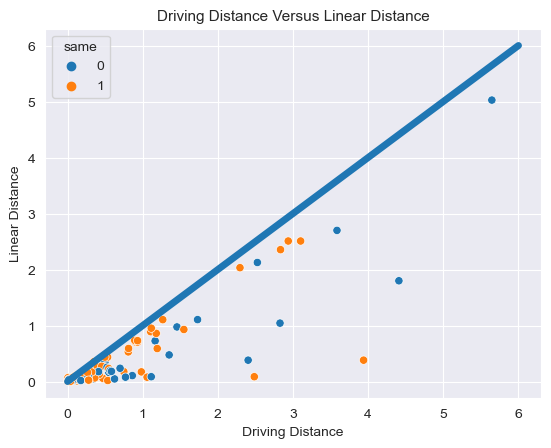

In [33]:
sns.scatterplot(data=df_dist, x= "Min_Distance_OSRM", y="Min_Distance_HR", hue="same")
sns.set_style("darkgrid")
plt.plot([6, 0], [6, 0], linewidth=5)
plt.title ("Driving Distance Versus Linear Distance", size =11)
plt.xlabel("Driving Distance")
plt.ylabel("Linear Distance")
plt.savefig('Distance Graph.png')

# Answer 8

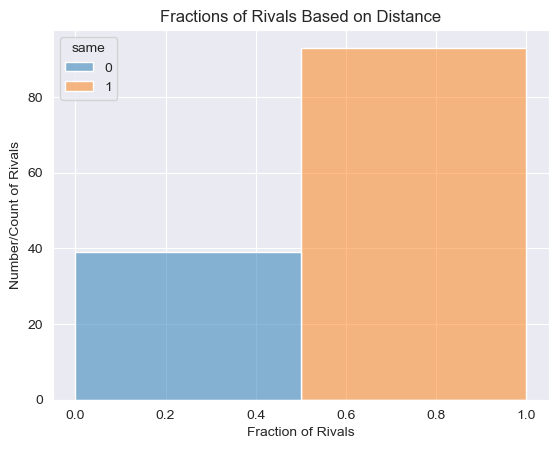

In [29]:
sns.histplot(data=df_dist, x="same", hue= "same", bins=2)
plt.title ("Fractions of Rivals Based on Distance")
plt.xlabel ("Fraction of Rivals")
plt.ylabel ("Number/Count of Rivals")
plt.savefig('Histogram of Distance.png')